Predicting Nigeria Car Price

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set(style = "white")
sns.set(style = "whitegrid", color_codes = True)

In [2]:
#Importng data set
prices = pd.read_csv("/Users/fuadhassan/Downloads/Nigerian_Car_Prices.csv")

EDA

In [37]:
## Variable types
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4095 entries, 0 to 4094
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           4095 non-null   int64  
 1   Make                 4095 non-null   object 
 2   Year of manufacture  3617 non-null   float64
 3   Condition            3616 non-null   object 
 4   Mileage              4024 non-null   float64
 5   Engine Size          3584 non-null   float64
 6   Fuel                 3607 non-null   object 
 7   Transmission         4075 non-null   object 
 8   Price                4095 non-null   object 
 9   Build                1127 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 320.0+ KB


In [3]:
# Sum of NA for each variable
prices.isna().sum()
prices.nunique()
    ## Condition, Feul, Transmission, are cateogical

Unnamed: 0             4095
Make                     49
Year of manufacture      29
Condition                 3
Mileage                3118
Engine Size              81
Fuel                      4
Transmission              4
Price                   579
Build                     1
dtype: int64

In [4]:
## Percentage of null values
(prices.isnull().sum() / len(prices)) * 100 ## Build can be dropped since it has a lot of null values

Unnamed: 0              0.000000
Make                    0.000000
Year of manufacture    11.672772
Condition              11.697192
Mileage                 1.733822
Engine Size            12.478632
Fuel                   11.916972
Transmission            0.488400
Price                   0.000000
Build                  72.478632
dtype: float64

In [5]:
## Summary Statistics
prices.describe()

,Unnamed: 0,Year of manufacture,Mileage,Engine Size
count,4095.000000,3617.000000,4.024000e+03,3584.000000
mean,2047.000000,2007.898535,1.825337e+05,3274.976562
std,1182.269005,4.300126,2.109233e+05,7693.489588
min,0.000000,1992.000000,1.000000e+00,3.000000
25%,1023.500000,2005.000000,1.020640e+05,2000.000000
50%,2047.000000,2008.000000,1.613525e+05,2500.000000
75%,3070.500000,2011.000000,2.319522e+05,3500.000000
max,4094.000000,2021.000000,9.976050e+06,371000.000000


In [6]:
prices_1 = prices.copy()

In [7]:
prices_1 = prices_1.drop(columns= ['Build']) ## Dropping Build

In [8]:
prices_1['Price'].replace(to_replace=',', value='', regex=True, inplace=True) ## Removing commas in price

In [9]:
prices_1['Price'] = prices_1['Price'].astype(float) ## Converting price to a float

In [10]:
Continous = prices_1.drop(columns=['Condition', 'Fuel', 'Transmission','Make'])

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


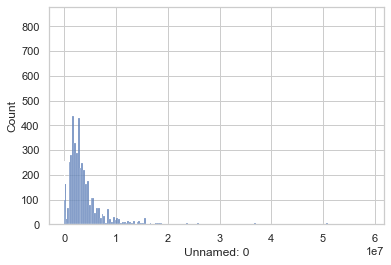

In [10]:
for con in Continous:
    print(sns.histplot(Continous,  x=con))

In [43]:
## Categorical
#sns.countplot(x= 'Condition', data = Category, palette= 'hls')
Categorical = prices_1.drop(columns = ['Unnamed: 0', 'Year of manufacture', 'Mileage', 'Engine Size', 'Price'])

In [47]:
## Value Counts for categories
for cat in Categorical:
    print(Categorical[cat].value_counts()) # No zero cell counts

Toyota           1469
Lexus             464
Mercedes-Benz     436
Honda             428
Ford              197
Hyundai           179
Nissan            173
Kia                90
Land Rover         74
Volkswagen         64
BMW                63
Mazda              63
Acura              56
Infiniti           41
Chevrolet          40
Peugeot            36
Mitsubishi         23
Volvo              22
Pontiac            22
Suzuki             21
Dodge              17
Audi               14
Opel               12
Jaguar             11
Jeep               11
Porsche             9
Renault             8
Chrysler            7
Fiat                6
GMC                 5
Lincoln             4
Changan             4
Skoda               3
Hummer              2
Isuzu               2
Citroen             2
JAC                 2
Mini                2
Buick               2
MG                  2
Cadillac            1
Foton               1
Rover               1
Saturn              1
SsangYong           1
Daihatsu  

In [11]:
# set up the threshold percent
threshold_percent = 1

series = pd.value_counts(prices_1['Make'])
mask = (series / series.sum() * 100).lt(threshold_percent)
prices_1 = prices_1.assign(Make_updated = np.where(prices_1['Make'].isin(series[mask].index),'Other', prices_1['Make'])) ## Creating other category for Make

In [12]:
prices_1['Make_updated'].value_counts()
prices_1 = prices_1.drop(columns= ['Make']) 

Analysis

In [13]:
### Train Test split
X = prices_1.drop(['Price','Unnamed: 0'], axis=1)  # features
y = prices_1['Price'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

Train

In [47]:
#Sum of NA
X_train.isnull().sum()

Year of manufacture    275
Condition              275
Mileage                 46
Engine Size            296
Fuel                   285
Transmission            13
Make_updated             0
dtype: int64

In [14]:
### Creating a binary flag before imputation for continuous
for col in X_train:
    #get dtype for column
    dt = X_train[col].dtype 
    #check if it is a number
    if dt == int or dt == float:
        X_train[col+"_missing"] = X_train[col].isnull()*1 
    else:
        X_train[col]

<ipython-input-14-db27334b26e1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col+"_missing"] = X_train[col].isnull()*1


In [15]:
#Dealing with NA's for Continuous
#prices[['Year of manufacture','Mileage','Engine Size']] = prices[[['Year of manufacture','Mileage','Engine Size']]].fillna(prices[['Year of manufacture','Mileage','Engine Size']].median())
for col in X_train:
    #get dtype for column
    dt = X_train[col].dtype 
    #check if it is a number
    if dt == int or dt == float:
        X_train[col] = X_train[col].fillna(X_train[col].median())
    else:
        X_train[col].fillna("")

<ipython-input-15-b643d207e6fd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[col] = X_train[col].fillna(X_train[col].median())


In [ ]:
X_train[X_train['Mileage_missing']==1] ## Checking to make sure column was created right and flag was created

In [16]:
X_train.isnull().sum()
#prices_1['Condition'].value_counts()

Year of manufacture              0
Condition                      275
Mileage                          0
Engine Size                      0
Fuel                           285
Transmission                    13
Make_updated                     0
Year of manufacture_missing      0
Mileage_missing                  0
Engine Size_missing              0
dtype: int64

In [86]:
#Categorical.columns
#Categorical.columns

Index(['Make', 'Condition', 'Fuel', 'Transmission'], dtype='object')

In [16]:
#Creating a missing categgory for catgorical variables
def impute_nan_create_category(X_train,ColName):
     X_train[ColName] = np.where(X_train[ColName].isnull(),"Missing",X_train[ColName])
## Call function to create new category for variables
for Columns in ['Condition', 'Fuel', 'Transmission']:
    impute_nan_create_category(X_train,Columns)

<ipython-input-16-6142d28fb64c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[ColName] = np.where(X_train[ColName].isnull(),"Missing",X_train[ColName])


In [17]:
#X_train[X_train['Transmission']== 'Missing']
X_train = pd.get_dummies(X_train, columns=['Make_updated','Condition', 'Fuel', 'Transmission'])

In [18]:
X_train.head()
#len(X_train)

,Year of manufacture,Mileage,Engine Size,Year of manufacture_missing,Mileage_missing,Engine Size_missing,Make_updated_Acura,Make_updated_BMW,Make_updated_Ford,Make_updated_Honda,...,Fuel_Diesel,Fuel_Electric,Fuel_Hybrid,Fuel_Missing,Fuel_Petrol,Transmission_AMT,Transmission_Automatic,Transmission_CVT,Transmission_Manual,Transmission_Missing
2684,2008.0,152837.0,2400.0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
2880,2002.0,151278.0,2400.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1867,2011.0,224612.0,2400.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1271,2006.0,114031.0,3500.0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3307,2005.0,272020.0,1800.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


Building XGBoost model on training data

In [33]:
## Libraries
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
from xgboost import XGBRegressor
import xgboost as xgb
#from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error as MSE

In [20]:
##XGB Tunning
params = { 'max_depth': [3,6,10],
           'learning_rate': [0.1, 0.15, 0.2, 0.25, 0.3],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [1]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))


Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best parameters: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Lowest RMSE:  2796896.1365005085


In [21]:
dmatrix = xgb.DMatrix(data=X_train, label=y_train)
params={'objective':'reg:squarederror',
         'max_depth': 3, 
         'colsample_bytree': 1,
         'learning_rate':0.2}
cv_results = xgb.cv(dtrain=dmatrix, params=params, nfold=10, metrics={'rmse'}, as_pandas=True, seed=20, num_boost_round=1000)
print('RMSE: %.2f' % cv_results['test-rmse-mean'].min())

RMSE: 2852917.71


In [22]:
## Building new model based on optimized parameters
model = XGBRegressor(n_estimators = 1000, colsample_bytree=1, max_depth = 3, learning_rate = .2,objective= 'reg:squarederror')
XGB = model.fit(X_train, y_train)

Test

In [23]:
### Creating a binary flag before imputation for continuous
for col in X_test:
    #get dtype for column
    dt = X_test[col].dtype 
    #check if it is a number
    if dt == int or dt == float:
        X_test[col+"_missing"] = X_test[col].isnull()*1 
    else:
        X_test[col]

#Dealing with NA's for Continuous
#prices[['Year of manufacture','Mileage','Engine Size']] = prices[[['Year of manufacture','Mileage','Engine Size']]].fillna(prices[['Year of manufacture','Mileage','Engine Size']].median())
for col in X_test:
    #get dtype for column
    dt = X_test[col].dtype 
    #check if it is a number
    if dt == int or dt == float:
        X_test[col] = X_test[col].fillna(X_test[col].median())
    else:
        X_test[col].fillna("")

<ipython-input-23-8e33266ce30c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col+"_missing"] = X_test[col].isnull()*1
<ipython-input-23-8e33266ce30c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = X_test[col].fillna(X_test[col].median())


In [24]:
#Creating a missing categgory for catgorical variables
def impute_nan_create_category(X_test,ColName):
     X_test[ColName] = np.where(X_test[ColName].isnull(),"Missing",X_test[ColName])
## Call function to create new category for variables
for Columns in ['Condition', 'Fuel', 'Transmission']:
    impute_nan_create_category(X_test,Columns)

<ipython-input-24-1df90d857586>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[ColName] = np.where(X_test[ColName].isnull(),"Missing",X_test[ColName])


In [25]:
#X_test[X_test['Engine Size_missing']==1]
X_test = pd.get_dummies(X_test, columns=['Make_updated','Condition', 'Fuel', 'Transmission']) 

In [26]:
## There are 34 columns in test but 35 columns in train. This variable is missing so
#I am creating this variable in the test and setting it to zero
X_test['Condition_Brand New'] = 0

In [27]:
column_to_move = X_test.pop("Condition_Brand New")
X_test.insert(21, "Condition_Brand New", column_to_move)

In [30]:
## Making predictions on the test set
y_pred=XGB.predict(X_test)

In [34]:
rmse = np.sqrt(MSE(y_test, y_pred))
print("RMSE : % f" %(rmse))

RMSE :  2807314.652137


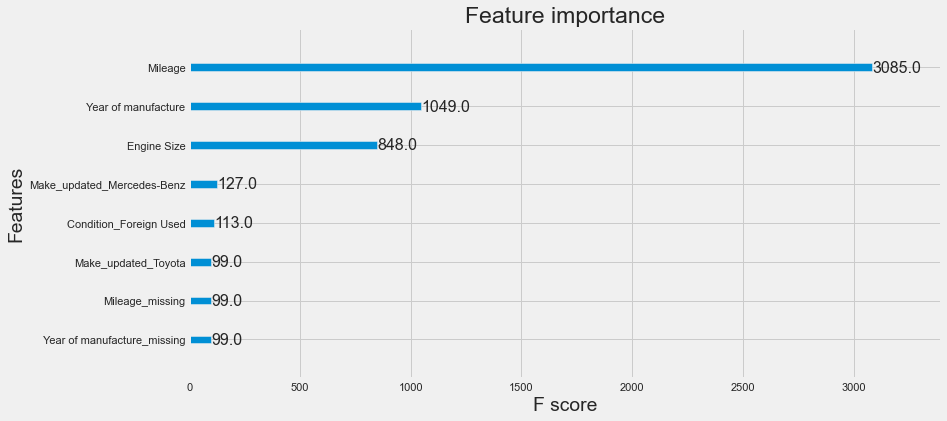

In [35]:
## Feature Importance

from xgboost import plot_importance
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(XGB, max_num_features=8, ax=ax)
plt.show()

In [37]:
## Plotting actual vs predicted 
pred = pd.DataFrame(y_pred)

In [42]:
pred = pred.apply(lambda x: '%.5f' % x, axis=1) ## Taking our scientific notation

In [60]:
pred.columns = ['Price']

In [67]:
y_test.reset_index(inplace=True, drop= True) ## resetting index

In [69]:
## Joining actual vs predicted
frame = [y_test, pred] 
result = pd.concat(frame, axis = 1)

In [75]:
#Renaming columns
result = result.rename(columns={"Price":"Actual Price"})
result = result.rename(columns={0 :"Predicted Price"})

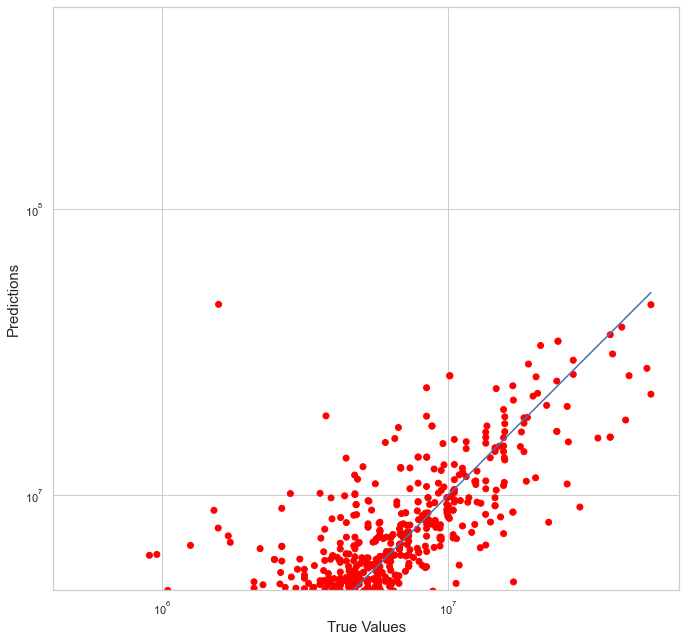

In [85]:
# convert the columns to numeric values
y_test = pd.to_numeric(y_test)
pred = pd.to_numeric(pred)

diff = np.abs(pred - y_test)
colors = np.where(diff < 0.1, 'green', 'red')

# plot the actual vs predicted values with color coding
plt.figure(figsize=(10,10))
plt.scatter(y_test, pred, c=colors)
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred), max(y_test))
p2 = min(min(pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()